#### EP4130: Data Science Analysis

#### Assignment 6

#### Ranveer Sahu- ES21BTECH11025

********************

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import emcee
!pip install astroml
from astroML.plotting import plot_mcmc

Defaulting to user installation because normal site-packages is not writeable


/home/coder/.local/lib/python3.10/site-packages/astroML/linear_model/linear_regression_errors.py:10: UserWarning: LinearRegressionwithErrors requires PyMC3 to be installed
  warnings.warn('LinearRegressionwithErrors requires PyMC3 to be installed')


****************

**Question 1**

In 1919, two expeditions sailed from Britain to test if the light deflection
from stars agrees with Einstein’s General Theory of Relativity. Einstein’s
theory predicts a value of 1.74 arc-seconds, whereas Newtonian gravity
predicts a value exactly half of that. The team by Eddington obtained a
value of 1.61 ± 0.40 arc-seconds, while the team by Crommelin reported a
value of 1.98 ± 0.16 arc-seconds. Calculate the Bayes factor between Gen-
eral Relativity and Newtonian gravity from those data, assuming Gaussian
likelihoods.

given data's:

In [2]:
einstein_time = 1.74
newton_time = einstein_time / 2
eddington_time = 1.61
eddington_error = 0.40
crommelin_time = 1.98
crommelin_error = 0.16

In [3]:
einstein_evidence = sp.stats.norm(einstein_time, eddington_error).pdf(eddington_time) * \
                    sp.stats.norm(einstein_time, crommelin_error).pdf(crommelin_time)

In [4]:

newton_evidence = sp.stats.norm(newton_time, eddington_error).pdf(eddington_time) * \
                    sp.stats.norm(newton_time, crommelin_error).pdf(crommelin_time)

In [5]:
print("Bayes Factor for the models of Einstein and Netwon are {} in favour of Einstein's model.".format(einstein_evidence/newton_evidence))

Bayes Factor for the models of Einstein and Netwon are 48164622958.34179 in favour of Einstein's model.


*******

**Question 2**

For exercise 1 in arXiv:1008.4686, calculate the 68% and 95% joint confidence intervals on $b$ and $m$.

In [6]:
data = [[203,495,21,],
[58,173,15,],
[210,479,27,],
[202,504,14,],
[198,510,30,],
[158,416,16,],
[165,393,14,],
[201,442,25,],
[157,317,52,],
[131,311,16,],
[166,400,34,],
[160,337,31,],
[186,423,42,],
[125,334,26,],
[218,533,16,],
[146,344,22]]

data = np.array(data)

x = data[: , 0]
y = data[: , 1]
e = data[: , 2]


As we learn in Machine learning course: models functions given below

1. **linear model** 

In [7]:
def linear_model(x , theta):
    return theta[0] + theta[1] * x

2. **log prior model** 

In [8]:
def log_prior(theta):

    if theta[2] < 0:
        return -np.inf
    else:
        return -1.5 * np.log((1 + theta[1]**2) / theta[2])

3. **log likelihood model** 

In [9]:
def log_likelihood(theta , x , y, e):
   
    y_pred = linear_model(x , theta[:2])
    return -0.5 * np.sum(np.log(2 * np.pi * theta[2]**2) + ((y - y_pred)**2 / theta[2]**2))

4. **log posterior model**

In [10]:
def log_posterior(theta , x , y , e):
  
    return log_prior(theta) + log_likelihood(theta , x , y , e)

In [11]:
n_walkers = 50
n_burn = 10000
n_steps = 15000
n_dim = 3

starting_guess = np.random.normal(0 , 1 , (n_walkers , n_dim))

sampler = emcee.EnsembleSampler(n_walkers , n_dim , log_posterior , args = (x , y , e))
sampler.run_mcmc(starting_guess , n_steps)

chain = sampler.chain[: , n_burn: , :].reshape((-1 , n_dim))

/home/coder/.local/lib/python3.10/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]


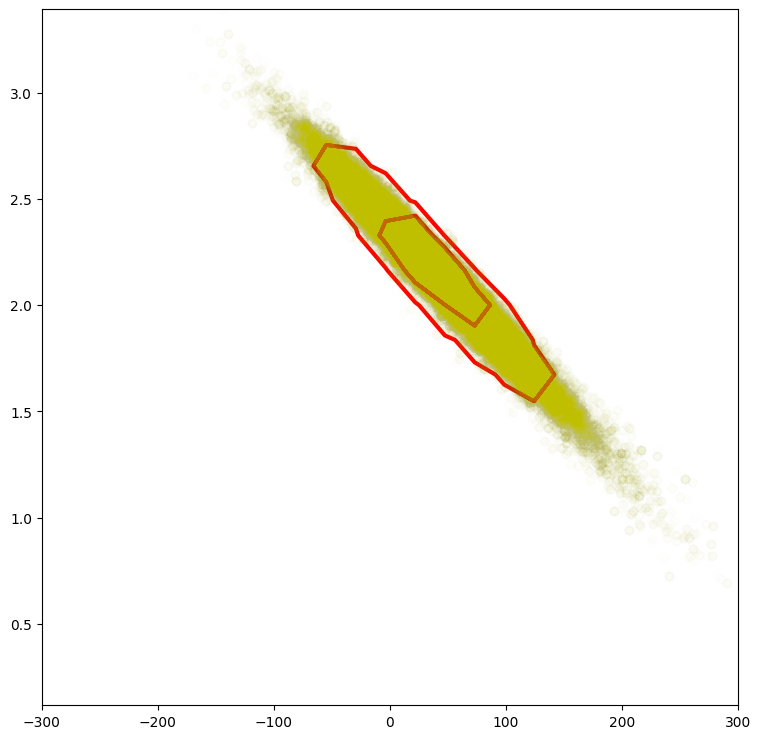

In [12]:
plot_mcmc(chain.T[:2 , :] , colors = ['r'  , 'r'] , linewidths = [3,3])
plt.plot(chain[:,0] , chain[:,1] , 'yo' , alpha = 0.01)
plt.xlim(-300 , 300)
plt.show()

*****

**Question 3**

Fit the data in Table 1 of arXiv:1008.4686 to a straight line, after including all the data points, (after ignoring σx and ρxy ) using both maximum likelihood analysis and using a Bayesian analysis to identify the outliers, using the same procedure as in the second of Jake VanDerPlas blog article. Show graphically the best fit line using both maximum likelihood analysis and also using Bayesian analysis, including the outlier points.

**Answer**

As we learn in machine learning course about maximum likelihood and bayesian model:


In [13]:
def linear_model(x , theta):
   
    if len(theta) != 2:
        print("Incorrect size of parameters")
        return 
    
    return theta[0] + theta[1] * x

**mean squared error (negative log likelyhood)** for a model

In [14]:
def MSE(theta , x , y , e):
    
    y_pred = linear_model(x , theta)
    return np.sum((y - y_pred)**2 / (2 * e**2))

In [15]:
data = [[201,592,61,],
[244,401,25,],
[47,583,38,],
[287,402,15,],
[203,495,21,],
[58,173,15,],
[210,479,27,],
[202,504,14,],
[198,510,30,],
[158,416,16,],
[165,393,14,],
[201,442,25,],
[157,317,52,],
[131,311,16,],
[166,400,34,],
[160,337,31,],
[186,423,42,],
[125,334,26,],
[218,533,16,],
[146,344,22]]

data = np.array(data)

x = data[: , 0]
y = data[: , 1]
e = data[: , 2]


In [16]:
theta_opt = sp.optimize.fmin(MSE , [0 , 0] , args = (x , y , e) , disp = False)

**Plotting**

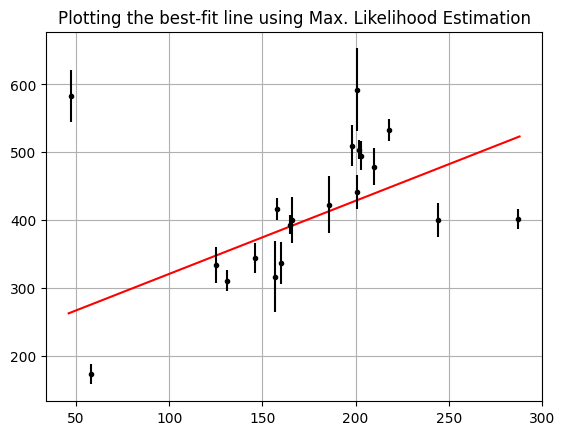

In [17]:
x_plot = np.linspace(x.min()-1 , x.max()+1 , 100)
plt.plot(x_plot , linear_model(x_plot , theta_opt) , 'r-' , label = "Linear Model")
plt.errorbar(x , y , yerr = e , fmt = 'k.')
plt.grid()
plt.title("Plotting the best-fit line using Max. Likelihood Estimation")
plt.show()

**posterior for a linear model considering Bayesian Analysis**

In [18]:
def log_posterior(theta , x , y , e , sigma_B):

    g = theta[2:]
    g = np.clip(g , 0 , 1)

    y_pred = linear_model(x , theta[:2])

    term1 = np.exp(-(y_pred - y)**2 / 2 * e**2) * g / np.sqrt(2 * np.pi * e**2)

    term2 = np.exp(-(y_pred - y)**2 / 2 * sigma_B**2) * (1 - g) / np.sqrt(2 * np.pi * sigma_B**2)
    return np.log(np.product(term1 + term2))   

In [19]:
n_walkers = 50 
n_steps = 25000  
n_burn = 15000  

theta_guess = np.random.normal(theta_opt , 1 , (n_walkers , 2))
g_guess = np.random.normal(0.5 , 0.1 , (n_walkers , len(x)))  
starting_guess = np.hstack((theta_guess , g_guess))

sampler = emcee.EnsembleSampler(nwalkers = n_walkers , ndim = 2+len(x) , log_prob_fn = log_posterior , args = (x , y , e , 50))
samples = sampler.run_mcmc(starting_guess , n_steps)

/tmp/ipykernel_3723/3197384969.py:11: RuntimeWarning: divide by zero encountered in log
  return np.log(np.product(term1 + term2))


In [20]:
chain = sampler.chain   # shape will be n_walkers x n_steps x n_dim
final = chain[: , n_burn : , : ].reshape(-1 , 2 + len(x)) # we shall remove the n_burn steps

In [21]:
# calculating the intercept and bias
theta_bayesian = np.mean(final[: , :2] , axis = 0)
g = np.mean(final[: , 2:] , axis = 0)

**Plotting**

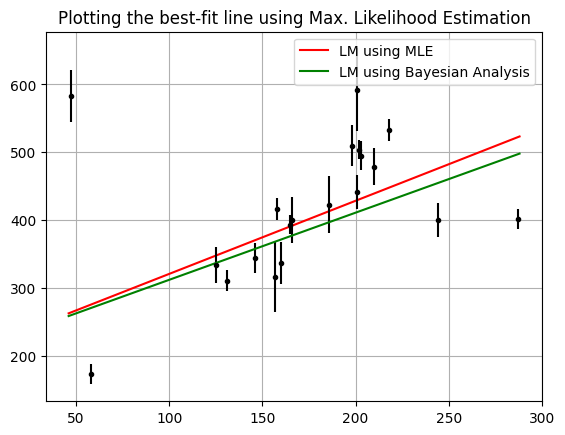

In [22]:
x_plot = np.linspace(x.min()-1 , x.max()+1 , 100)
plt.plot(x_plot , linear_model(x_plot , theta_opt) , 'r-' , label = "LM using MLE" , alpha = 1)
plt.errorbar(x , y , yerr = e , fmt = 'k.')
plt.plot(x_plot , linear_model(x_plot , theta_bayesian) , 'g-' , label = "LM using Bayesian Analysis")
plt.legend()
plt.grid()
plt.title("Plotting the best-fit line using Max. Likelihood Estimation")
plt.show()